In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 30)

df = pd.read_csv('dataset2.csv')

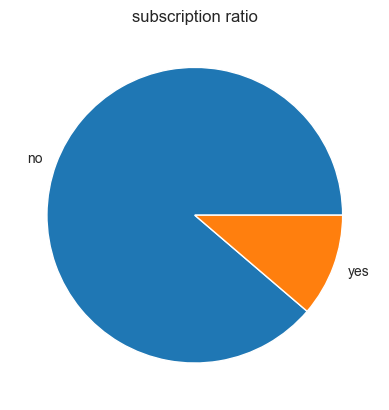

In [2]:
y_counts = df.y.value_counts()
plt.pie(y_counts.values, labels=y_counts.index)
plt.title('subscription ratio');

In [3]:
y_counts

y
no     39487
yes     5011
Name: count, dtype: int64

In [4]:
X = df.drop(columns=['y'])
y = df['y']

### Using Random Forests without any sampling

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.10, random_state=42, stratify=y)

In [7]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [8]:
y_pred = rf_classifier.predict(X_test)

In [9]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.9056179775280899
Classification Report:
              precision    recall  f1-score   support

          no       0.93      0.97      0.95      3949
         yes       0.64      0.38      0.47       501

    accuracy                           0.91      4450
   macro avg       0.78      0.68      0.71      4450
weighted avg       0.89      0.91      0.89      4450



### Using Random Forests with 'SMOTE'

In [10]:
from imblearn.over_sampling import SMOTE

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1, random_state=42, stratify=y)

In [12]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [13]:
y_train_smote.value_counts()

y
no     35538
yes    35538
Name: count, dtype: int64

In [14]:
y_test.value_counts()

y
no     3949
yes     501
Name: count, dtype: int64

In [15]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=54, class_weight='balanced')
rf_classifier.fit(X_train_smote, y_train_smote)

RandomForestClassifier(class_weight='balanced', random_state=54)

In [16]:
y_pred = rf_classifier.predict(X_test)

In [17]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.8973033707865169
Classification Report:
              precision    recall  f1-score   support

          no       0.96      0.93      0.94      3949
         yes       0.53      0.68      0.60       501

    accuracy                           0.90      4450
   macro avg       0.75      0.80      0.77      4450
weighted avg       0.91      0.90      0.90      4450



In [28]:
# Load the dataset
df = pd.read_csv('dataset1.csv')

# Check for missing values in the dataset
if df.isnull().sum().any():
    print("Missing values found, filling with column means.")
    df = df.fillna(df.mean())  # Impute missing values with mean

# Split features and target variable
X = df.drop(columns=['y'])
y = df['y']

In [29]:
y = y.replace({'yes':1, 'no':0})
y

C:\Users\sayur\AppData\Local\Temp\ipykernel_8944\4031281201.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace({'yes':1, 'no':0})


0        0
1        0
2        0
3        0
4        0
        ..
44493    1
44494    1
44495    1
44496    0
44497    0
Name: y, Length: 44498, dtype: int64

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

# Build the model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),  # 32 neurons in the first layer
    Dense(16, activation='relu'),  # 16 neurons in the second layer
    Dense(8, activation='relu'),  # 16 neurons in the third layer (new)
    Dense(4, activation='relu'),   # 8 neurons in the fourth layer (new)
    Dense(1, activation='sigmoid')  # Single output neuron with sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

# Make predictions on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Apply threshold to get binary predictions

# Generate and print the classification report
print(classification_report(y_test, y_pred))

Epoch 1/30


C:\Users\sayur\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1002/1002 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8151 - loss: 0.4610 - val_accuracy: 0.9040 - val_loss: 0.2364
Epoch 2/30
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9020 - loss: 0.2344 - val_accuracy: 0.9072 - val_loss: 0.2323
Epoch 3/30
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9037 - loss: 0.2305 - val_accuracy: 0.9067 - val_loss: 0.2255
Epoch 4/30
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9030 - loss: 0.2296 - val_accuracy: 0.9084 - val_loss: 0.2309
Epoch 5/30
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9036 - loss: 0.2283 - val_accuracy: 0.9064 - val_loss: 0.2231
Epoch 6/30
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9027 - loss: 0.2318 - val_accuracy: 0.9061 - val_loss: 0.2249
Epoch 7/30
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9029 - loss: 0.2237 - val_accuracy: 0.9062 - val_loss: 0.2251
Epoch 8/30
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9068 - loss: 0.2213 - val_accurac

In [32]:
from imblearn.over_sampling import SMOTE
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Build the model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_smote.shape[1],)),  # 32 neurons in the first layer
    Dense(16, activation='relu'),  # 16 neurons in the second layer
    Dense(8, activation='relu'),  # 16 neurons in the third layer (new)
    Dense(4, activation='relu'),   # 8 neurons in the fourth layer (new)
    Dense(1, activation='sigmoid')  # Single output neuron with sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_smote, y_train_smote, epochs=30, batch_size=32, validation_split=0.2)

# Make predictions on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Apply threshold to get binary predictions

# Generate and print the classification report
print(classification_report(y_test, y_pred))

Epoch 1/30


C:\Users\sayur\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1777/1777 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7709 - loss: 0.4710 - val_accuracy: 0.8432 - val_loss: 0.4153
Epoch 2/30
1777/1777 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8355 - loss: 0.3621 - val_accuracy: 0.8295 - val_loss: 0.4403
Epoch 3/30
1777/1777 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8399 - loss: 0.3530 - val_accuracy: 0.7940 - val_loss: 0.5042
Epoch 4/30
1777/1777 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8423 - loss: 0.3462 - val_accuracy: 0.8702 - val_loss: 0.3847
Epoch 5/30
1777/1777 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8468 - loss: 0.3407 - val_accuracy: 0.8471 - val_loss: 0.4194
Epoch 6/30
1777/1777 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8470 - loss: 0.3422 - val_accuracy: 0.8275 - val_loss: 0.4514
Epoch 7/30
1777/1777 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8462 - loss: 0.3369 - val_accuracy: 0.7914 - val_loss: 0.5204
Epoch 8/30
1777/1777 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8512 - loss: 0.3303 - val_accurac